In [3]:
import pandas as pd

In [1]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24815 sha256=2d10f1fbc46a7aa9fbeda595ac460552b77966e0b60de3a182f20c11aad48114
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [4]:
dnabert2_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/dnabert2_words.txt', header=None, names=['DNABERT2'])
dnabert2_list = dnabert2_words['DNABERT2'].tolist()
hg38_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/hg38_words.txt', header=None, names=['Hg38'])
hg38_list = hg38_words['Hg38'].tolist()
mouse_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/mouse_words.txt', header=None, names=['Mouse'])
mouse_list = mouse_words['Mouse'].tolist()
yeast_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/yeast_words.txt', header=None, names=['Yeast'])
yeast_list = yeast_words['Yeast'].tolist()
bacteria_words = pd.read_csv('https://raw.githubusercontent.com/leannmlindsey/gLM_tokenization/main/data/bacteria_words.txt', header=None, names=['Bacteria'])
bacteria_list = bacteria_words['Bacteria'].tolist()

In [5]:
from upsetplot import from_contents
words = from_contents(
    {"dnabert2": dnabert2_list, "human": hg38_list, "mouse": mouse_list, "yeast": yeast_list, "bacteria": bacteria_list}
)
words

id
dnabert2 human mouse yeast bacteria          
True     True  True  True  True             A
                           True            AA
         False True  True  True           AAA
         True  True  True  True          AAAA
         False False False True        AAAAAA
...                                       ...
False    False False False True      TTTTTTCA
                           True      TTTTTTGA
                           True             V
                           True             W
                           True             Y

[12690 rows x 1 columns]

In [6]:
words['token length (nt)  '] = words['id'].apply(lambda x: len(x))

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>,
 'extra1': <Axes: xlabel='_bin', ylabel='token length (nt)  '>}

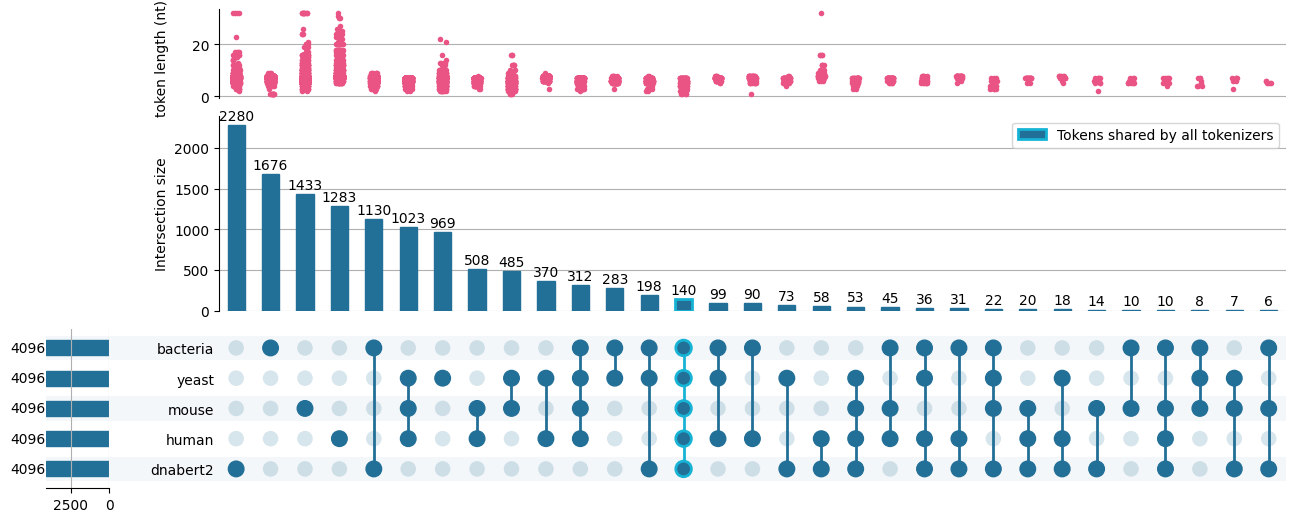

In [10]:
from upsetplot import UpSet

upset = UpSet(words, facecolor="#226f97",subset_size="count", sort_by="cardinality",show_counts=True)

upset.add_catplot(value="token length (nt)  ", kind="strip", color="#e95484", s=4)
upset.style_subsets(
    present=["bacteria", "yeast", "mouse", "human", "dnabert2"], edgecolor="#16b3d5", linewidth=2, label="Tokens shared by all tokenizers"
)
upset.plot()

#plt.savefig("upset_cat.pdf", format='pdf',bbox_inches='tight')
#plt.show()

#cc = ['#226f97', '#16b3d5', '#feca15', '#eb755c', '#e95484']
# = [dk blue, x,yellow, orange, pink]